# Train Custom Model Using Scikit Learn - Deadlift
## 1. Read in Collected Data and Process

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [28]:
df = pd.read_csv('deadlift_with_scaled_angles.csv')

In [29]:
df.head(3)

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
0,d_correct_down,0.592055,0.387002,0.761125,0.976802,0.585143,0.381295,0.735319,0.980862,0.582941,...,177.560402,166.367398,27.148545,5.191758,174.881712,142.294680,151.262011,122.608052,41.795307,30.777025
1,d_correct_down,0.587373,0.376647,0.683136,0.983089,0.581771,0.369854,0.658460,0.985313,0.579841,...,177.918179,172.034668,26.262979,21.238804,178.542442,135.394806,163.224030,70.288358,54.805242,3.797267
2,d_correct_down,0.603379,0.289000,0.876913,0.977582,0.599490,0.280128,0.851040,0.982493,0.597362,...,170.727989,166.680440,35.846927,4.031645,155.468359,149.916871,144.265439,140.940849,49.840057,36.984585


In [30]:
print(df['class'].unique())

['d_correct_down' 'd_correct_up' 'd_spine_neutral_up'
 'd_spine_neutral_down' 'd_arms_spread_up' 'd_arms_spread_down'
 'd_arms_narrow_up' 'd_arms_narrow_down']


In [31]:
df[df['class'] == 'd_correct_up']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
3,d_correct_up,0.704687,0.148774,0.440767,0.995209,0.700908,0.139350,0.365987,0.995613,0.695389,...,177.523870,132.931517,29.613070,16.997338,168.837691,155.016238,128.929074,174.221529,33.755265,70.726128
4,d_correct_up,0.716225,0.146869,0.293682,0.998649,0.713821,0.136261,0.216470,0.998652,0.709841,...,173.445382,157.346506,30.894814,18.371730,177.483958,148.394609,141.780664,166.979991,40.271481,76.875673
5,d_correct_up,0.630466,0.228244,0.440133,0.998669,0.629182,0.218079,0.382716,0.998379,0.627187,...,177.293834,122.797130,23.771027,4.966137,171.524080,177.088251,134.873191,177.112245,33.885254,61.461782
10,d_correct_up,0.697473,0.158551,0.451071,0.991049,0.692633,0.149205,0.382283,0.992482,0.686416,...,176.399609,115.755075,25.894353,10.769656,162.957928,160.612464,134.549554,175.586190,40.943076,65.683062
11,d_correct_up,0.720811,0.144309,0.346179,0.996304,0.718774,0.134078,0.272779,0.996799,0.714024,...,173.549075,165.288170,30.457741,14.300216,175.067099,155.955845,136.047001,165.301447,38.392943,84.496132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,d_correct_up,0.523595,0.143818,-0.166640,0.999999,0.540697,0.128956,-0.135898,0.999996,0.550788,...,166.370614,163.287978,27.898174,27.572499,168.050158,162.373125,123.727414,108.946302,61.708954,48.042787
784,d_correct_up,0.520855,0.176195,-0.409605,0.999999,0.539977,0.157631,-0.393470,0.999997,0.550829,...,170.138909,166.721832,22.001744,18.715617,169.283084,171.892721,126.122166,112.338776,65.554389,47.133236
789,d_correct_up,0.514838,0.169958,-0.458523,0.999998,0.533339,0.156689,-0.441334,0.999994,0.544492,...,160.591734,164.025994,21.669211,21.636248,172.188178,170.010941,131.225872,118.688957,68.301192,55.181543
790,d_correct_up,0.534706,0.127905,-0.167135,0.999998,0.553773,0.116206,-0.138962,0.999994,0.563353,...,152.971286,171.419093,23.718112,21.893783,170.772943,166.422522,124.911004,106.784502,61.882904,47.779013


In [32]:
X = df.drop('class', axis=1)
y = df['class']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Train Machine Learning Classification Model

In [34]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [35]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [36]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [37]:
fit_models['rc'].predict(X_test)

array(['d_correct_down', 'd_arms_spread_up', 'd_correct_up',
       'd_correct_down', 'd_spine_neutral_down', 'd_spine_neutral_up',
       'd_correct_up', 'd_correct_up', 'd_correct_down',
       'd_arms_narrow_up', 'd_arms_spread_down', 'd_spine_neutral_down',
       'd_correct_up', 'd_correct_up', 'd_correct_down',
       'd_arms_spread_up', 'd_arms_narrow_down', 'd_spine_neutral_up',
       'd_spine_neutral_up', 'd_arms_narrow_up', 'd_spine_neutral_up',
       'd_arms_narrow_down', 'd_arms_narrow_down', 'd_arms_spread_down',
       'd_arms_spread_up', 'd_correct_down', 'd_arms_spread_down',
       'd_correct_up', 'd_arms_narrow_up', 'd_spine_neutral_down',
       'd_spine_neutral_down', 'd_correct_down', 'd_correct_up',
       'd_correct_up', 'd_spine_neutral_down', 'd_correct_down',
       'd_correct_up', 'd_correct_up', 'd_arms_narrow_up',
       'd_correct_down', 'd_arms_narrow_up', 'd_arms_spread_up',
       'd_arms_spread_up', 'd_arms_spread_down', 'd_arms_narrow_down',
       

## 3.Evaluate and Serialize Model

In [38]:
from sklearn.metrics import classification_report

# 예측 결과를 저장할 딕셔너리 초기화
predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 각 모델의 분류 보고서 출력
for algorithm, y_pred in predictions.items():
    print(f'--- {algorithm} 모델 분류 결과 평가 ---')
    print(classification_report(y_test, y_pred))
    print()

--- lr 모델 분류 결과 평가 ---
                      precision    recall  f1-score   support

  d_arms_narrow_down       0.95      0.95      0.95        40
    d_arms_narrow_up       0.87      0.89      0.88        44
  d_arms_spread_down       1.00      1.00      1.00        38
    d_arms_spread_up       0.88      0.91      0.89        32
      d_correct_down       0.97      0.94      0.96        35
        d_correct_up       0.96      0.86      0.91        57
d_spine_neutral_down       0.88      1.00      0.94        44
  d_spine_neutral_up       0.82      0.81      0.82        52

            accuracy                           0.91       342
           macro avg       0.92      0.92      0.92       342
        weighted avg       0.91      0.91      0.91       342


--- rc 모델 분류 결과 평가 ---
                      precision    recall  f1-score   support

  d_arms_narrow_down       0.95      0.93      0.94        40
    d_arms_narrow_up       0.79      0.86      0.83        44
  d_arms_spread_dow

In [39]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 0.9123
rc: 0.8801
rf: 0.9620
gb: 0.9474
--- precision ---
lr: 0.9138
rc: 0.8816
rf: 0.9635
gb: 0.9495
--- recall ---
lr: 0.9123
rc: 0.8801
rf: 0.9620
gb: 0.9474
--- f1-score ---
lr: 0.9120
rc: 0.8787
rf: 0.9620
gb: 0.9472


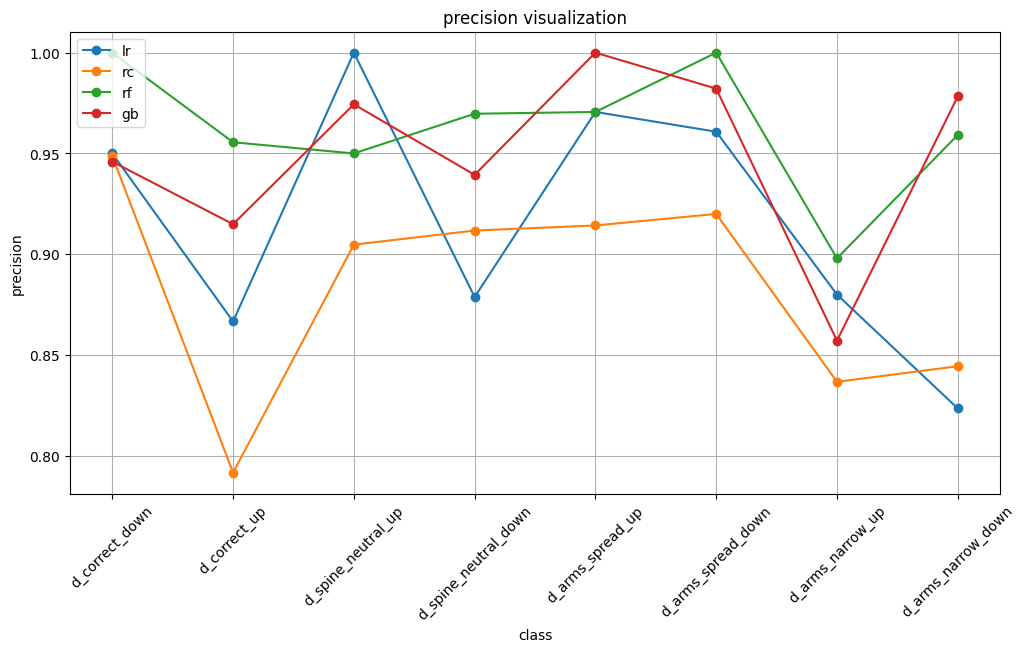

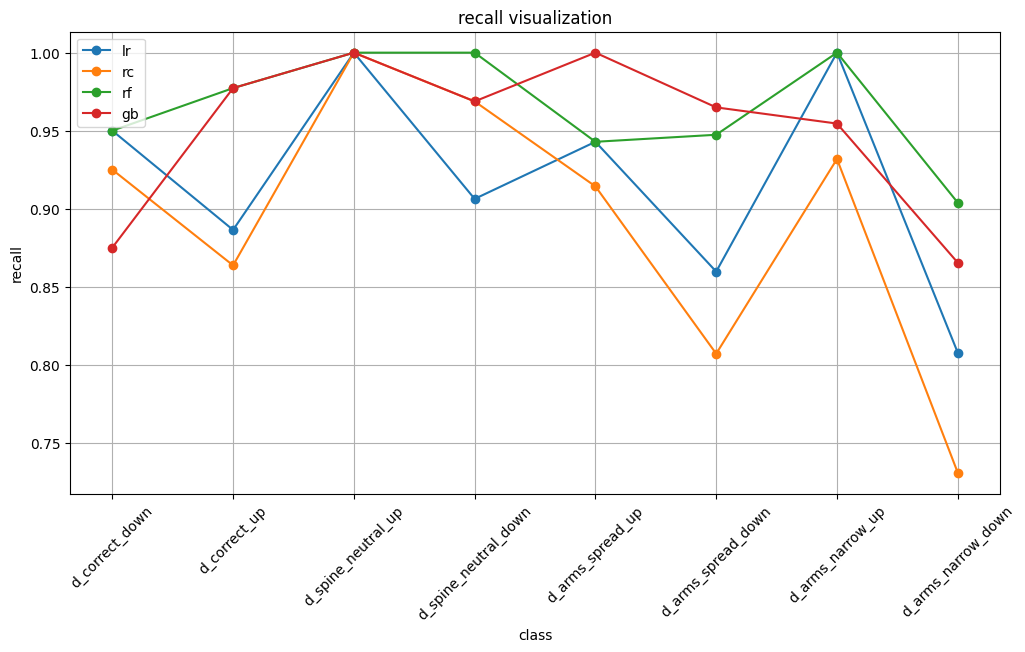

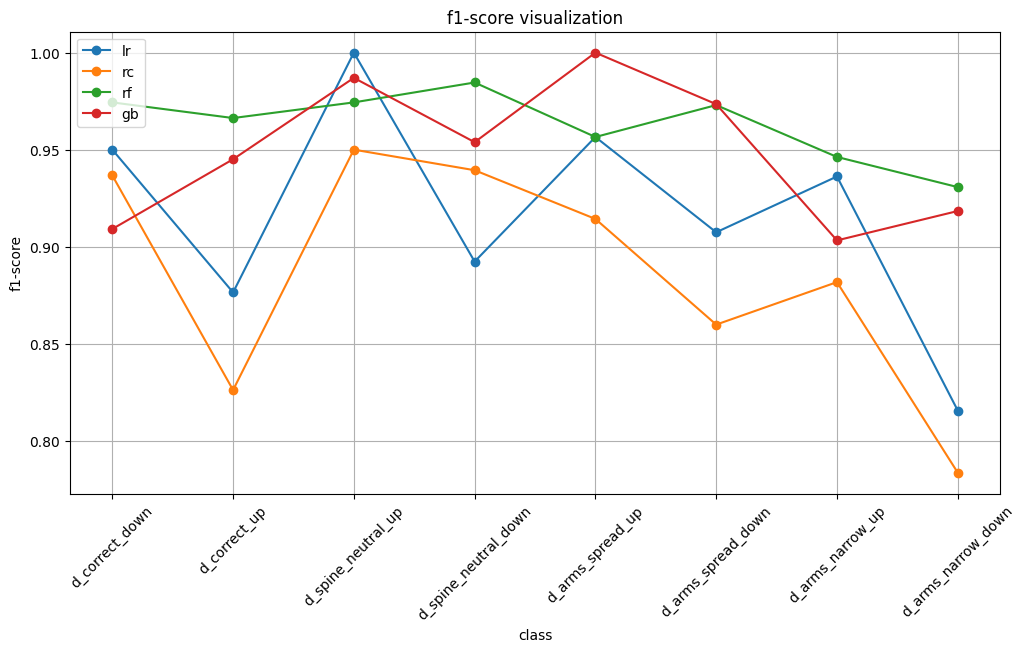

In [40]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 예측 결과를 저장할 딕셔너리 초기화
predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 평가 지표 시각화
metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.title(f'{metric} visualization')

    for algorithm, y_pred in predictions.items():
        report = classification_report(y_test, y_pred, output_dict=True)
        metric_score = [report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
        plt.plot(df['class'].unique(), metric_score, label=algorithm, marker='o', linestyle='-')

    plt.xlabel('class')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

## 4. Make Detections with Model

In [ ]:
with open('deadlift.pkl', 'wb') as f:
    pickle.dump(fit_models['gb'], f)